In [1]:
import requests
import pandas as pd

In [2]:
response = requests.get('https://web.byui.edu/studentemployment/api/jobs')

data_json = response.json()

data = pd.DataFrame(data_json)

In [3]:
pd.options.display.max_columns = None

## Top 5 highest paid jobs

In [4]:
data.sort_values('payRate', ascending=False).head(5)[['title','payRate','workSchedule']]

,title,payRate,workSchedule
6,Systems Developer,12.0,Flexible M-F
7,Reports and Systems Analyst,12.0,M-F Varies
70,Health Center Lab Assistant,11.5,NaN
47,CIT325 OnlineTA,11.3,Flexible
13,CIT325 OnlineTA,11.3,Flexible


## All Jobs that are not 'Online','TA', and 'Custodial'

In [5]:
print(f'''There are {data[~data.title.str.contains('TA|Custodian|Online')].shape[0]} jobs that are not Online, TA, not custodial''')

data[~data.title.str.contains('TA|Custodian|Online')].sort_values('payRate', ascending=False)[['title','payRate','workSchedule']]

There are 28 jobs that are not Online, TA, not custodial


,title,payRate,workSchedule
6,Systems Developer,12.00,Flexible M-F
7,Reports and Systems Analyst,12.00,M-F Varies
70,Health Center Lab Assistant,11.50,NaN
18,Phones Specialist,10.38,"4pm-6pm, 5pm-8pm"
42,Clinician Aide,10.15,M-F TBD
20,Food Services Student Jobs,10.00,Many Shifts Available
40,Assessment Consultant,10.00,Flexible
19,Grounds Crew 12,9.58,8:00AM-12:00PM
32,Grounds Crew 6,9.58,"1:00PM to 5:00 PM, Monday-Friday"
33,Grounds Crew 11,9.58,NaN


In [ ]:
data.dateUpdated = data.dateUpdated.dt.time

In [ ]:
data.set_index('dateUpdated').plot()

In [ ]:
data[data.payRate == data.payRate.max()]

In [ ]:
data.sort_values('payRate',ascending=False).head(3)

In [ ]:
data['payRate'].iloc[0]

# TESTING AREA

In [12]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.94 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payRate', ylabel='Density'>

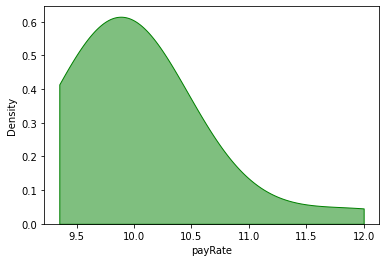

In [35]:
sns.kdeplot(data.payRate, shade=True, color="g", bw=0.94, alpha=0.5, cut=0)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.75 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payRate', ylabel='Density'>

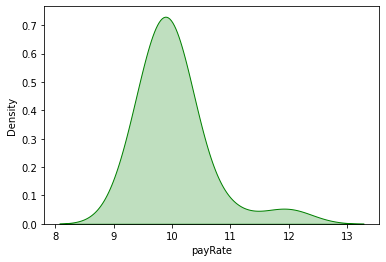

In [ ]:
sns.kdeplot(data.payRate, shade=True, color="g", bw=0.75)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payRate', ylabel='Density'>

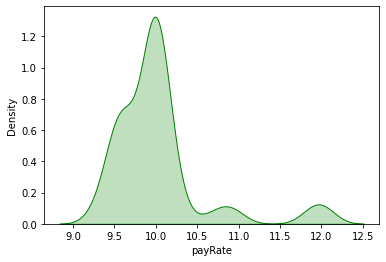

In [25]:
sns.kdeplot(data.payRate, shade=True, color="g", bw=0.3)

In [11]:
data[~data.payRate.isna()].payRate.value_counts()

10.00    29
9.58     12
10.25     2
12.00     2
9.35      2
10.90     2
9.60      1
10.70     1
11.90     1
9.50      1
9.75      1
Name: payRate, dtype: int64

In [48]:
jobs_to_remove = ['TA','Custodian','Online|Grounds']
jobs_to_remove_str = '|'.join(jobs_to_remove)
jobs_to_remove_str

'TA|Custodian|Online|Grounds'

In [57]:
data[~data.title.str.contains(jobs_to_remove_str)].sort_values('payRate', ascending=False)[['title','payRate','workSchedule']].to_csv('Karadepo.csv')

In [63]:
x="""import requests
import pandas as pd
from datetime import datetime, timedelta

response = requests.get('https://web.byui.edu/studentemployment/api/jobs')

data_json = response.json()

data = pd.DataFrame(data_json)

col_dates = ['dateUpdated','startDate','endDate','beginningDate','recruitingStartDate']

data[col_dates] = data[col_dates].astype('datetime64[ns]')

data.dateUpdated = data.dateUpdated.apply(lambda x: datetime.strftime(x, "%Y-%m-%d"))

data['URL'] = data.jobID.apply(lambda x: f'https://web.byui.edu/StudentEmployment/job/{x}')

columns_to_drop = [
    'jobID', # not needed for EDA
    'description', # not needed for EDA
    'summary', # not needed for EDA
    'displayJob', # single boolean
    # 'dateUpdated', # not needed for display
    # 'startDate',
    # 'endDate', # not needed for display
    'approximateHoursPerWeek', # not consistent
    'positionsAllocated', # not relevant
    'positionsAvailble', # not relevant
    # 'workSchedule', # not needed for EDA
    # 'recruitingStartDate', # not relevant
    'requireResume', # not relevant
    'limitApplicants', # not relevant
    'limitNumber', # not relevant
    'applicants', # empty
    'jobQuestions', # empty
    'isOnline', # not accurate
    'allowOnline', # not accurate
    'jobMajors' # not relevant
    ]

data.drop(columns_to_drop, axis=1, inplace=True)"""

In [61]:
data[~data.title.str.contains(jobs_to_remove_str)].sort_values('payRate', ascending=False)[['title','payRate','workSchedule','URL']].to_csv('Karadepo.csv')

In [79]:
import time

code=[]

for i in x.split(' '):
    code.append(i)
    

' '.join(code)

'import requests\nimport pandas as pd\nfrom datetime import datetime, timedelta\n\nresponse = requests.get(\'https://web.byui.edu/studentemployment/api/jobs\')\n\ndata_json = response.json()\n\ndata = pd.DataFrame(data_json)\n\ncol_dates = [\'dateUpdated\',\'startDate\',\'endDate\',\'beginningDate\',\'recruitingStartDate\']\n\ndata[col_dates] = data[col_dates].astype(\'datetime64[ns]\')\n\ndata.dateUpdated = data.dateUpdated.apply(lambda x: datetime.strftime(x, "%Y-%m-%d"))\n\ndata[\'URL\'] = data.jobID.apply(lambda x: f\'https://web.byui.edu/StudentEmployment/job/{x}\')\n\ncolumns_to_drop = [\n    \'jobID\', # not needed for EDA\n    \'description\', # not needed for EDA\n    \'summary\', # not needed for EDA\n    \'displayJob\', # single boolean\n    # \'dateUpdated\', # not needed for display\n    # \'startDate\',\n    # \'endDate\', # not needed for display\n    \'approximateHoursPerWeek\', # not consistent\n    \'positionsAllocated\', # not relevant\n    \'positionsAvailble\', # n

In [84]:
', '.join(['Tom','Seb','Taylor'])

'Tom, Seb, Taylor'

In [98]:
data_higher = data[data.payRate == data.payRate.max()]
for e in range(data_higher.shape[0]):
    print(data_higher.title.iloc[0])
    print(data_higher.departmentName.iloc[0])
    print(data_higher.payRate.iloc[0])
    print(data_higher.workSchedule.iloc[0])
    print(data_higher.URL.iloc[0])

Reports and Systems Analyst
BYU Idaho Support Center
12.0
M-F Varies
https://web.byui.edu/StudentEmployment/job/1187288
Reports and Systems Analyst
BYU Idaho Support Center
12.0
M-F Varies
https://web.byui.edu/StudentEmployment/job/1187288


In [4]:
data.columns

Index(['jobID', 'title', 'departmentName', 'description', 'summary',
       'displayJob', 'dateUpdated', 'startDate', 'endDate', 'managerName',
       'approximateHoursPerWeek', 'payRate', 'positionsAllocated',
       'positionsAvailble', 'workSchedule', 'beginningDate',
       'recruitingStartDate', 'requireResume', 'limitApplicants',
       'limitNumber', 'applicants', 'jobQuestions', 'isOnline', 'allowOnline',
       'jobMajors'],
      dtype='object')

In [5]:
data.departmentName.nunique()

28